## Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [32]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
# Importing dataset
media = pd.read_csv('mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
# Drop 'Unnamed: 7'
media = media.drop('Unnamed: 7', axis = 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [6]:
# Converting date to pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [14]:
# Deriving "days since the show started"

d0 = date(2017, 2, 28)
d1 = media.Date
delta = pd.to_datetime(d1).dt.date - d0
media['day'] = delta

In [15]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [16]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [17]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79


<Axes: xlabel='day'>

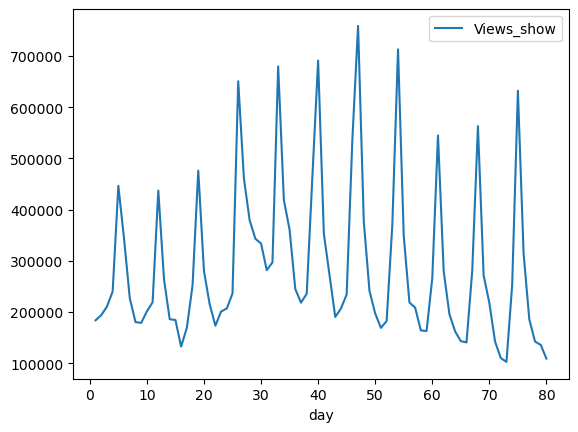

In [18]:
# days vs Views_show

media.plot.line(x='day', y='Views_show')

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_71172/1097046838.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha = 0.5)


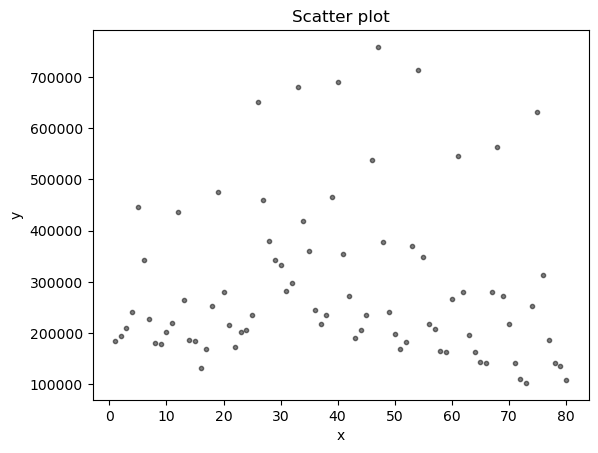

In [19]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha = 0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

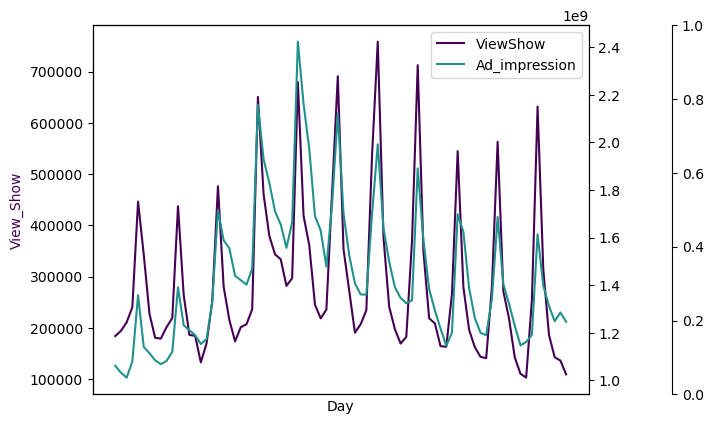

In [24]:
# plot for days vs Views_show and days vs Ad_impressions
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_xlabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(9)

p1, = host.plot(media.day, media.Views_show, color=color1, label="ViewShow")
p2, = par1.plot(media.day, media.Ad_impression, color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

# no x-ticks
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')


In [25]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


#### Running first model (lm1) Weekday & visitors 

In [27]:
# Putting feature variable to X
X = media[['Visitors', 'weekday']]

# Putting response variable to y
y = media['Views_show']

In [29]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [31]:
# fit the model to the training data
lm.fit(X, y)

LinearRegression()

In [33]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           8.01e-12
Time:                        20:23:27   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [34]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else : return 0
    return i

media['weekend'] = [cond(i) for i in media['day']]

In [35]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Running second model (lm2) visitors & weekend

In [36]:
# Putting feature variable to x
X = media[['Visitors', 'weekend']]

# Putting response variable to y
y = media['Views_show']

In [37]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           2.51e-12
Time:                        20:30:08   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

#### Running third model (lm3) visitors, weekend & Character_A

In [38]:
# Putting feature variable to x
X = media[['Visitors', 'weekend', 'Character_A']]

# Putting response variable to y
y = media['Views_show']

In [39]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_3 = sm.OLS(y, X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.53e-14
Time:                        20:31:09   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [41]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
...,...,...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0,142260


In [43]:
media.Lag_Views.replace(108961, 0, inplace=True)
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061
...,...,...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0,142260


#### Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [44]:
# Putting feature variable to x
X = media[['Visitors', 'weekend', 'Character_A', 'Lag_Views']]

# Putting response variable to y
y = media['Views_show']

In [45]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_4 = sm.OLS(y, X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           3.16e-21
Time:                        20:35:03   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_71172/1456736746.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(media.corr(), annot = True)


<Axes: >

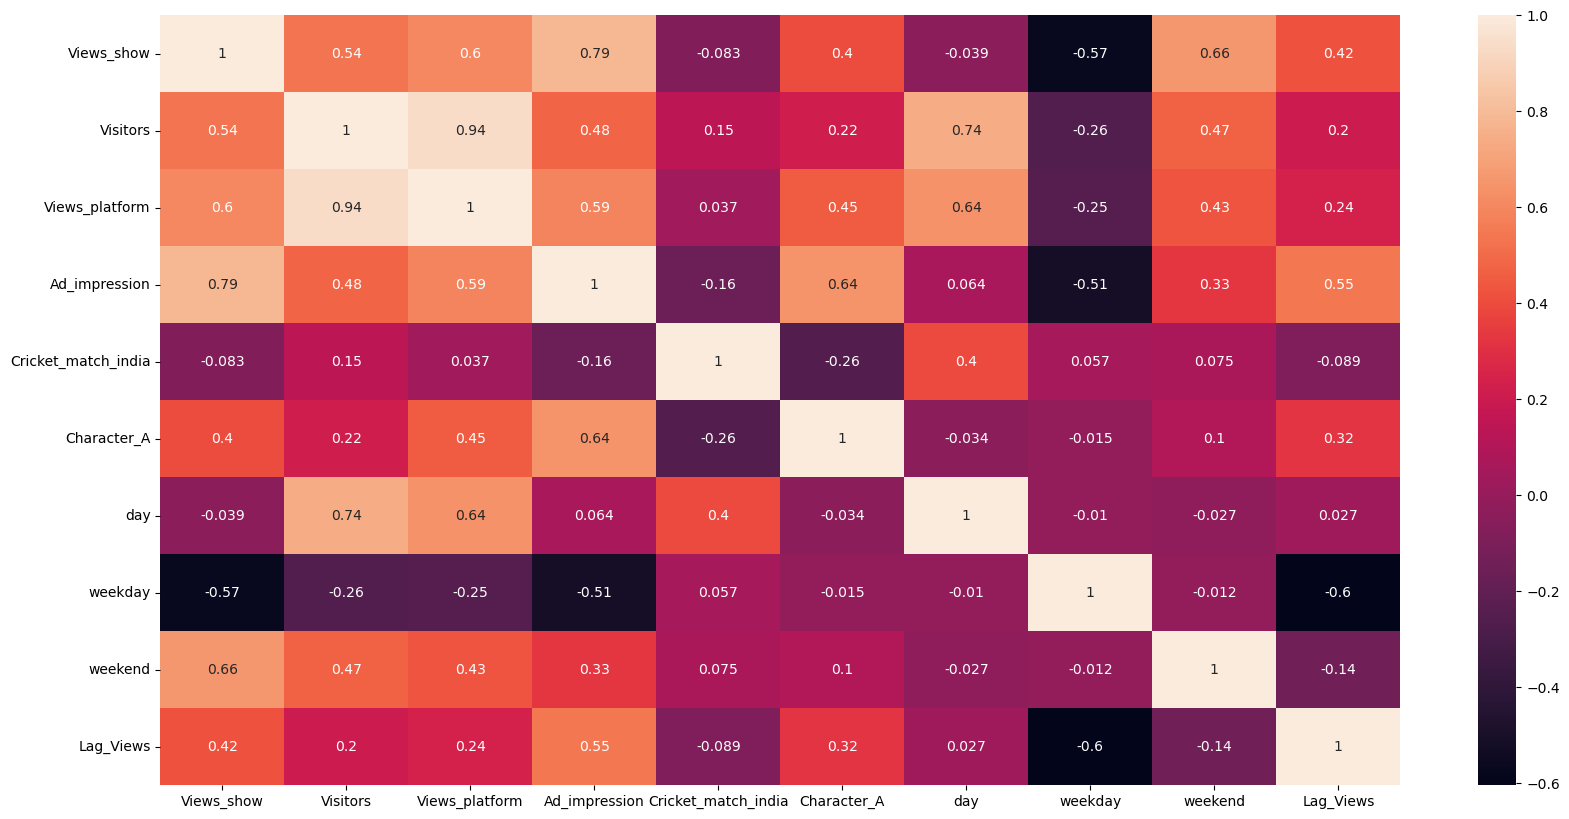

In [46]:
plt.figure(figsize = (20, 10))
sns.heatmap(media.corr(), annot = True)

#### Running fifth model (lm5) Character_A, weekend & Views_platform

In [47]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Views_platform']]

# Putting response variable to y
y = media['Views_show']

In [48]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_5 = sm.OLS(y, X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           3.59e-15
Time:                        20:37:45   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

#### Running sixth model (lm6) Character_A, weekend & Visitors

In [49]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Visitors']]

# Putting response variable to y
y = media['Views_show']

In [50]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_6 = sm.OLS(y, X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.53e-14
Time:                        20:38:39   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [51]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Visitors', 'Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [53]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_7 = sm.OLS(y, X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.10e-25
Time:                        20:40:10   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [54]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Ad_impression']]

# Putting response variable to y
y = media['Views_show']

In [55]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_8 = sm.OLS(y, X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.05e-26
Time:                        20:40:22   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [56]:
# Ad impression in million
media['Ad_impression_million'] = media['Ad_impression']/1000000

#### Running nineth model (lm9) Character_A, weekend, Ad_impressions_million & Cricket_match_india

In [57]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Ad_impression_million', 'Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [58]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_9 = sm.OLS(y, X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.02e-25
Time:                        20:49:36   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

#### Running tenth model (lm10) Character_A, weekend & ad_impressions_million

In [59]:
# Putting feature variable to x
X = media[['weekend', 'Character_A', 'Ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [60]:
# Unlike SKLearn, stats models don't automatically fit a constant
# so we need to use the method sm.add_constant(X) in order to add a constant.
X = sm.add_constant(X)

# create a fitted model in one line
lm_10 = sm.OLS(y, X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.05e-26
Time:                        20:51:48   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

#### Making predictions using lm10

In [61]:
# Making predictions using the model
X = media[['weekend', 'Character_A', 'Ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [64]:
print('Mean_Sqaured_Error :', mse)
print('r_sqaure_value :', r_squared)

Mean_Sqaured_Error : 4677651616.2534075
r_sqaure_value : 0.802643446857565


Text(0, 0.5, 'Views')

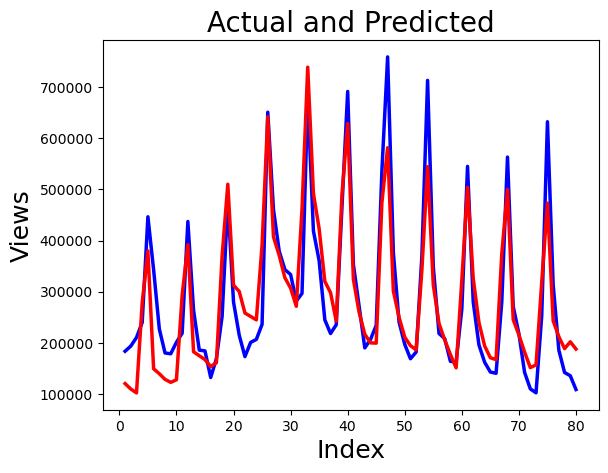

In [66]:
# Actual vs Predicted
c = [i for i in range(1, 81, 1)]
plt.plot(c, media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, Predicted_views, color="red", linewidth=2.5, linestyle="-")
plt.title("Actual and Predicted", fontsize=20)
plt.xlabel("Index", fontsize=18)
plt.ylabel("Views", fontsize=18)

Text(0, 0.5, 'Views_show-Predicted_views')

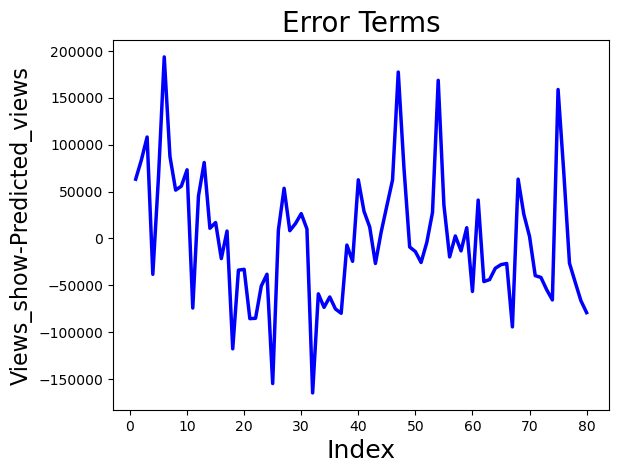

In [67]:
# Error terms
c = [i for i in range(1,81, 1)]
plt.plot(c, media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
plt.title("Error Terms", fontsize=20)
plt.xlabel("Index", fontsize=18)
plt.ylabel("Views_show-Predicted_views", fontsize=16)

In [68]:
# Making prediction using the model
X = media[['weekend', 'Character_A', 'Visitors']]
X = sm.add_constant(X)
Predicted_views = lm_6.predict(X)

In [69]:
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [70]:
print('Mean_Sqaured_Error :', mse)
print('r_sqaure_value :', r_squared)

Mean_Sqaured_Error : 9815432480.451523
r_sqaure_value : 0.585873408097934
